## Dataset Description

## Business questions

In [1]:
#!pip install yellowbrick

In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import datetime
import matplotlib
import sys
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.columns, df.shape

(Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
        'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
        'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
       dtype='object'),
 (2240, 29))

In [5]:
df.describe(include= "all")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

## Data Preparation & Feature Engineering

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# Dealing with null values
df['Income'] = df['Income'].fillna(df['income'].mean())

In [14]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,...,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.0,2193.0,2193.000000
mean,5585.623803,1968.787506,51308.045144,0.445052,0.508436,49.075239,303.364797,26.246694,163.227542,37.335157,...,5.353853,0.073871,0.071135,0.068399,0.061104,0.013224,0.009576,3.0,11.0,0.147287
std,3250.634983,11.974711,20400.747953,0.537647,0.543749,28.922441,335.697476,39.661084,215.571215,54.468972,...,2.406406,0.261621,0.257110,0.252488,0.239575,0.114258,0.097409,0.0,0.0,0.354472
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.000000,1959.000000,34984.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5462.000000,1970.000000,51111.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8420.000000,1977.000000,67893.000000,1.000000,1.000000,74.000000,504.000000,33.000000,230.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,94384.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Dealing with outliers

<Axes: xlabel='Income', ylabel='Density'>

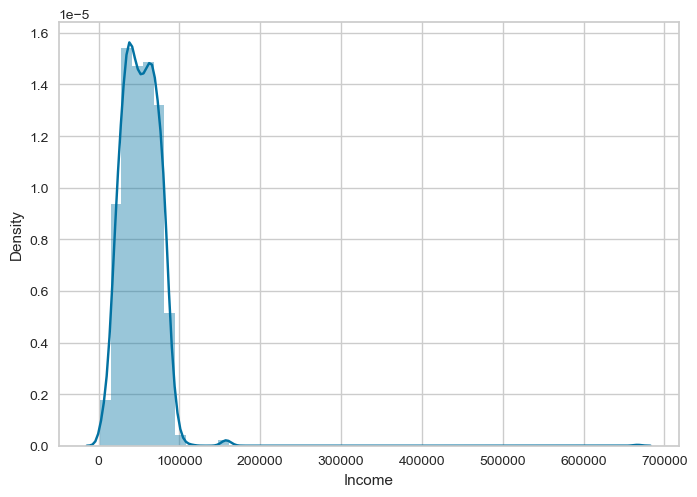

In [8]:
# income column 
sns.distplot(df["Income"])

In [9]:
# removing outlier in this column
q = df["Income"].quantile(0.99)
df = df[df["Income"]<q]
df.describe(include = "all")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2193.000000,2193.000000,2193,2193,2193.000000,2193.000000,2193.000000,2193,2193.000000,2193.000000,...,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.0,2193.0,2193.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,661,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1105,851,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5585.623803,1968.787506,NaN,NaN,51308.045144,0.445052,0.508436,NaN,49.075239,303.364797,...,5.353853,0.073871,0.071135,0.068399,0.061104,0.013224,0.009576,3.0,11.0,0.147287
std,3250.634983,11.974711,NaN,NaN,20400.747953,0.537647,0.543749,NaN,28.922441,335.697476,...,2.406406,0.261621,0.257110,0.252488,0.239575,0.114258,0.097409,0.0,0.0,0.354472
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.000000,1959.000000,NaN,NaN,34984.000000,0.000000,0.000000,NaN,24.000000,24.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5462.000000,1970.000000,NaN,NaN,51111.000000,0.000000,0.000000,NaN,49.000000,174.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8420.000000,1977.000000,NaN,NaN,67893.000000,1.000000,1.000000,NaN,74.000000,504.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


<Axes: xlabel='Income', ylabel='Density'>

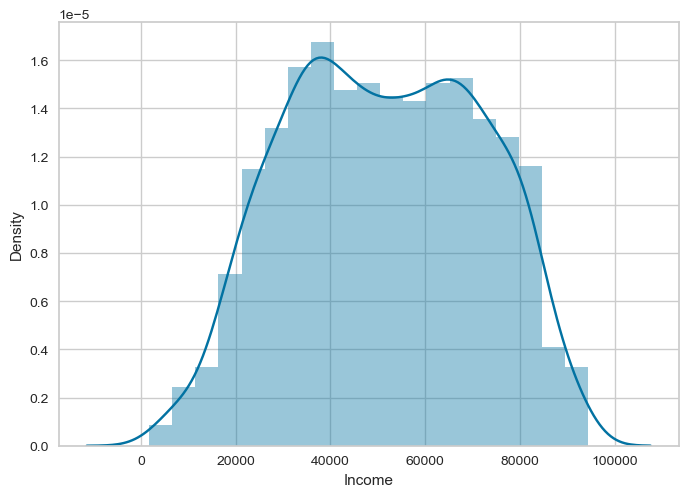

In [10]:
# Conforming the outcome
sns.distplot(df["Income"])

<Axes: xlabel='Kidhome', ylabel='Density'>

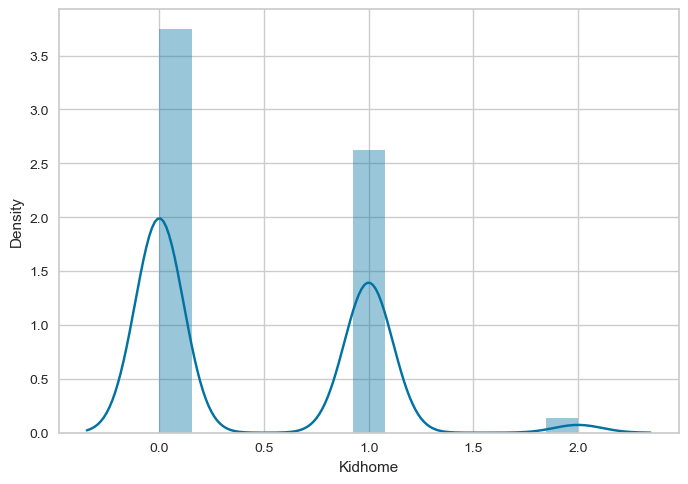

In [26]:
sns.distplot(df["Kidhome"])


<Axes: xlabel='Recency', ylabel='Density'>

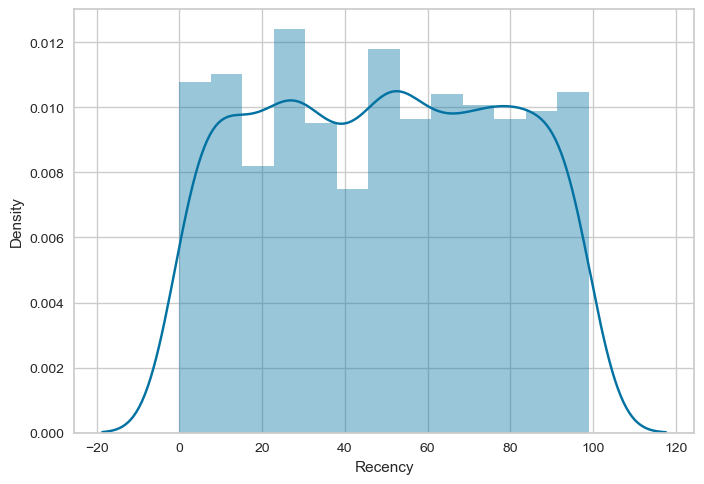

In [27]:
sns.distplot(df["Recency"])

<Axes: xlabel='MntWines', ylabel='Density'>

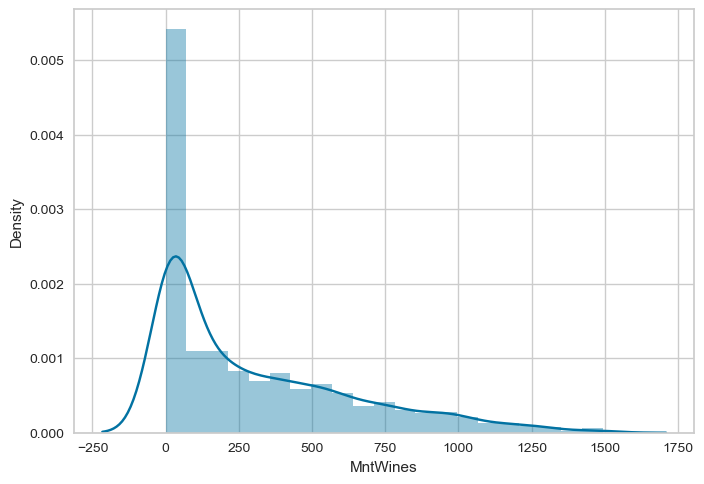

In [28]:
sns.distplot(df["MntWines"])

<Axes: xlabel='MntFruits', ylabel='Density'>

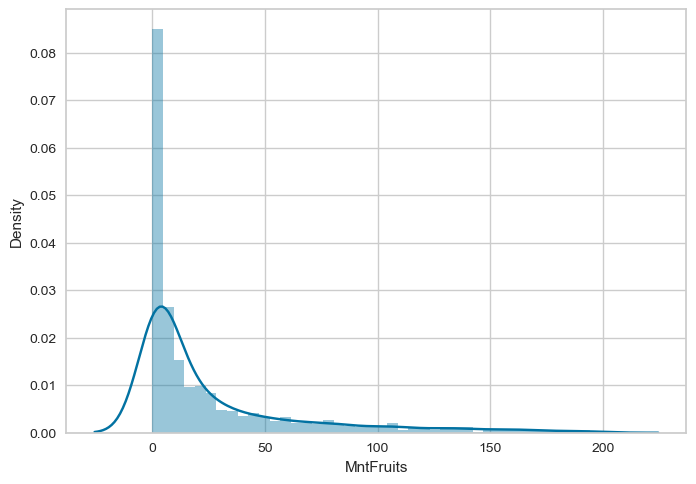

In [30]:
sns.distplot(df["MntFruits"])

<Axes: xlabel='MntMeatProducts', ylabel='Density'>

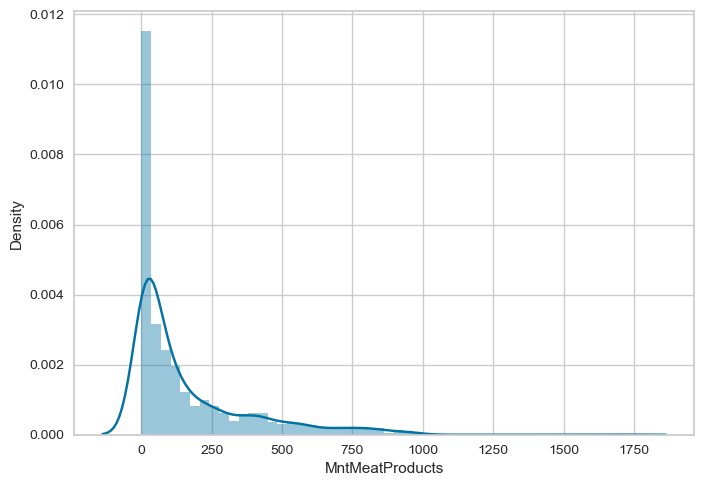

In [31]:
sns.distplot(df["MntMeatProducts"])

<Axes: xlabel='MntFishProducts', ylabel='Density'>

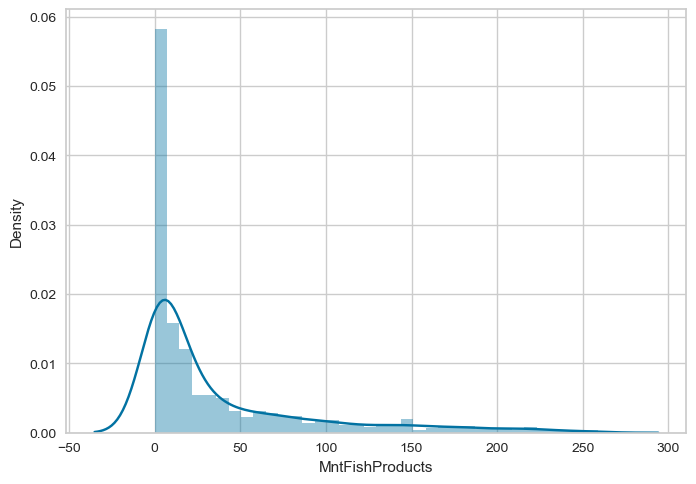

In [34]:
sns.distplot(df["MntFishProducts"])

<Axes: xlabel='MntSweetProducts', ylabel='Density'>

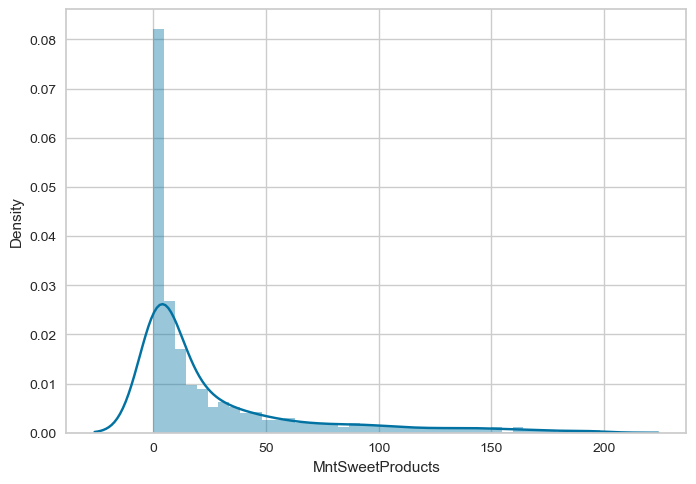

In [35]:
sns.distplot(df["MntSweetProducts"])

<Axes: xlabel='MntGoldProds', ylabel='Density'>

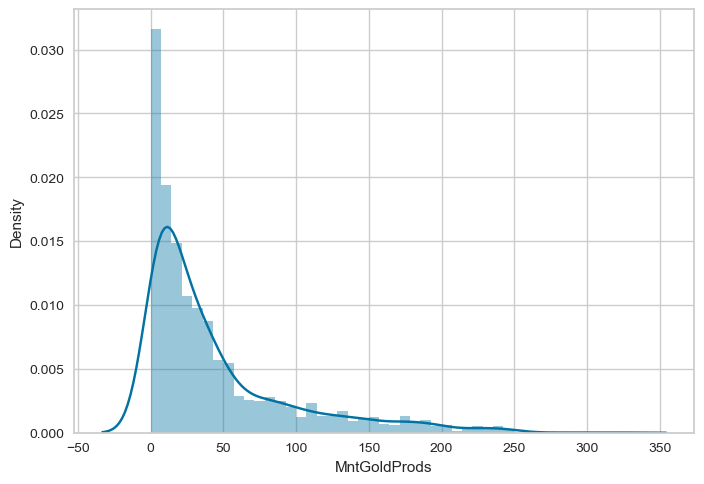

In [37]:
sns.distplot(df["MntGoldProds"])

<Axes: xlabel='NumDealsPurchases', ylabel='Density'>

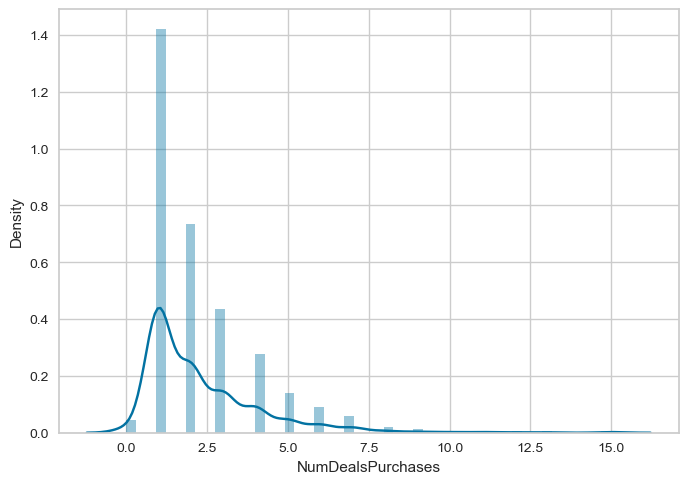

In [38]:
sns.distplot(df["NumDealsPurchases"])

<Axes: xlabel='NumCatalogPurchases', ylabel='Density'>

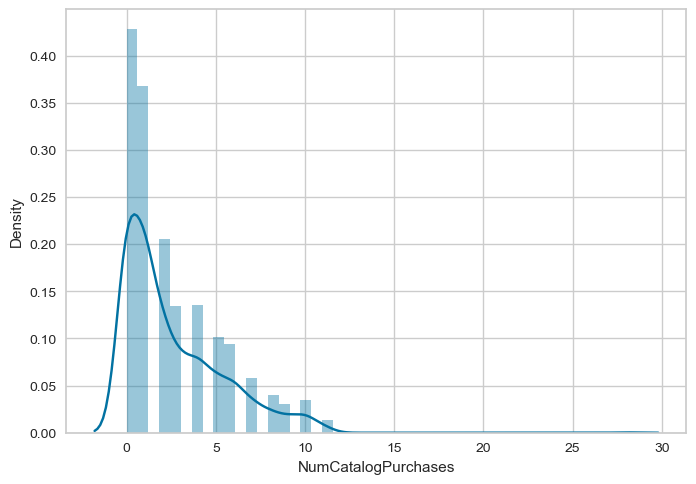

In [40]:
sns.distplot(df["NumCatalogPurchases"])

<Axes: xlabel='NumStorePurchases', ylabel='Density'>

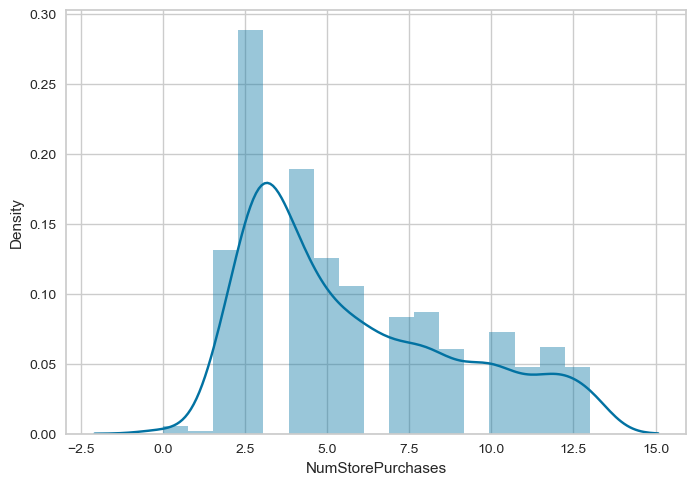

In [42]:
sns.distplot(df["NumStorePurchases"])

<Axes: xlabel='NumWebVisitsMonth', ylabel='Density'>

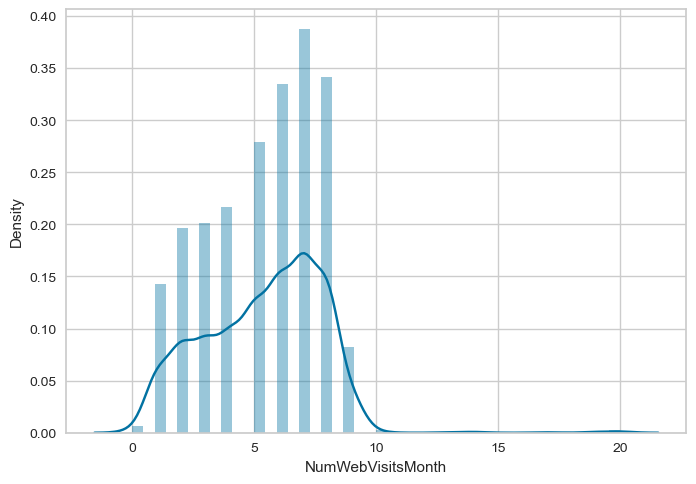

In [43]:
sns.distplot(df["NumWebVisitsMonth"])

## categorial columns

In [16]:
#Education column
df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [17]:
#marital status column
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [45]:
# changing the names
status_mapping = {
    'Together': 'Partner',
    'Married': 'Partner',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
}
# Replace the values in this column
df['Marital_Status'] = df['Marital_Status'].replace(status_mapping)

In [46]:
df["Marital_Status"].unique()

array(['Single', 'Partner'], dtype=object)

<Axes: xlabel='Year_Birth', ylabel='Density'>

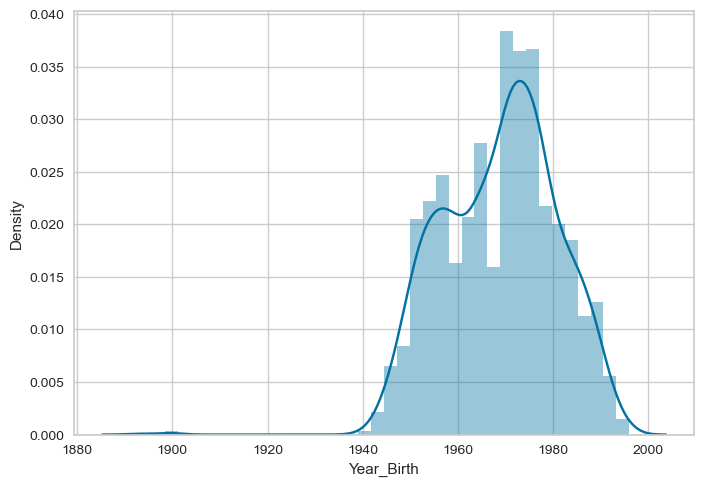

In [50]:
# Date column
sns.distplot(df["Year_Birth"])


<Axes: xlabel='Year_Birth', ylabel='Density'>

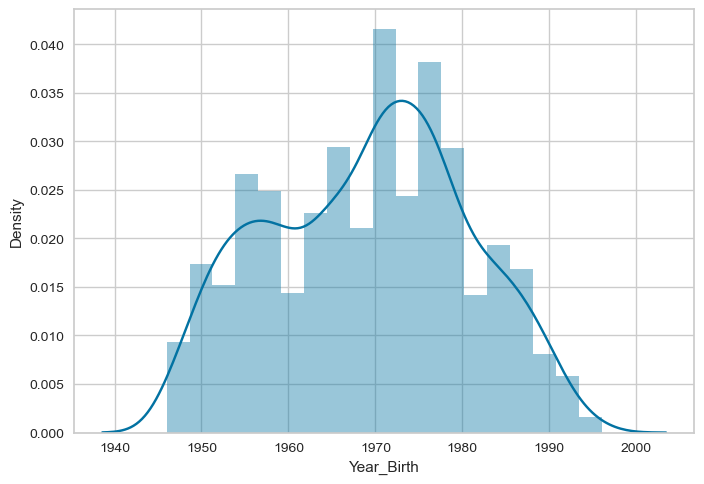

In [52]:
# removing outlier in this column
p = df["Year_Birth"].quantile(0.01)
df = df[df["Year_Birth"]>p]
sns.distplot(df["Year_Birth"])